## 先预装相应的库

In [746]:
!pip install --upgrade pip
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install PyWavelets




26174.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
26181.25s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
26187.49s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
26193.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
26200.09s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
26206.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


### **对数据进行预处理 Pre_process**


#### 用到的库

In [747]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # 计算四种性能度量指标
from sklearn.cluster import MeanShift
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pywt
import glob
import os
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")


#### 导入数据

In [748]:

df_abnormal = pd.DataFrame()

for file in glob.glob('./C/Abnormal/*.csv'):
    data = pd.read_csv(file, header=None, usecols=[0])
    data = data.T
    df_abnormal = pd.concat([df_abnormal, data], axis=0)

df_abnormal = df_abnormal.reset_index(drop=True)
df_abnormal


,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
0,1030.2,9.90890,41.2590,18.8610,17.92000,5.3356,1.6502,5.0361,2.0408,3.19930,...,0.000004,0.000089,0.000051,0.000203,0.000032,0.000015,0.000110,0.000344,0.000014,0.000025
1,29077.0,234.63000,483.6000,5246.3000,1813.90000,4232.8000,4718.7000,3259.3000,943.5100,1427.80000,...,0.001031,0.000757,0.004106,0.001682,0.001729,0.001154,0.002846,0.001439,0.001640,0.002398
2,126710.0,1728.20000,1600.2000,183.1800,24.08000,99.8230,1925.2000,42569.0000,53286.0000,1494.60000,...,0.015112,0.009482,0.013966,0.009507,0.013273,0.012162,0.008586,0.015941,0.008288,0.012250
3,11466.0,30.25800,198.5100,35.5710,2.38820,31.4760,73.5080,39.5530,11.4240,2596.00000,...,0.000412,0.000219,0.000014,0.000004,0.000051,0.000005,0.000066,0.000232,0.000084,0.000304
4,16842.0,41.04000,427.2400,219.0300,31.57800,31.0570,181.0100,50.8390,402.8700,3208.30000,...,0.003723,0.001327,0.002250,0.002583,0.001656,0.001540,0.002558,0.002215,0.001928,0.001150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,1433.8,0.33405,9.3182,8.6230,0.65013,5.9598,7.9583,29.0820,94.3720,592.52000,...,0.000061,0.000007,0.000045,0.000057,0.000036,0.000015,0.000103,0.000064,0.000116,0.000005
865,1552.6,6.06220,195.7600,80.0420,15.26400,1.0580,34.6910,262.3300,209.5400,125.91000,...,0.000220,0.000113,0.000596,0.000350,0.000287,0.000767,0.000146,0.000010,0.000071,0.000076
866,3124.9,53.19300,47.1380,1.6496,1.35570,2.7692,7.1514,3.2550,0.2061,2.15060,...,0.000093,0.000047,0.000148,0.000240,0.000005,0.000176,0.000318,0.000227,0.000148,0.000219
867,6997.5,9.13370,13.1280,25.7910,56.10400,129.7000,330.2900,1729.8000,3520.9000,225.88000,...,0.000379,0.000192,0.000021,0.000022,0.000033,0.000012,0.000117,0.000039,0.000043,0.000089


In [749]:


df_normal = pd.DataFrame()

for file in glob.glob('./C/Normal/*.csv'):
    data = pd.read_csv(file, header=None, usecols=[0])
    data = data.T
    df_normal = pd.concat([df_normal, data], axis=0)

df_normal = df_normal.reset_index(drop=True)
df_normal


,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
0,174.01,4.575400,7.063200,0.4134,0.16162,21.499,39.34800,2.50040,0.007751,0.69382,...,0.000044,0.000004,8.305700e-08,0.000065,0.000016,4.436200e-06,0.000092,0.000101,0.000054,0.000059
1,448.17,0.236870,0.095427,8.9695,100.05000,113.890,1.45220,0.64064,8.873300,3.48000,...,0.000059,0.000020,3.018400e-05,0.000017,0.000035,7.275000e-05,0.000022,0.000305,0.000423,0.000370
2,15673.00,12.969000,95.755000,1357.3000,384.31000,1195.800,1204.80000,768.94000,806.590000,481.10000,...,0.002476,0.000723,1.657000e-04,0.000034,0.000441,1.009500e-03,0.000092,0.000884,0.000771,0.000678
3,6232.60,0.059740,13.947000,9.5228,4.20450,290.860,580.48000,15.69400,4.002200,21.38900,...,0.000262,0.000250,1.305900e-04,0.000389,0.000348,5.382200e-05,0.000160,0.000146,0.000340,0.000163
4,444.14,0.206490,1.864300,4.2799,23.54200,10.610,0.52166,20.50800,26.489000,2.63940,...,0.000061,0.000098,6.791000e-05,0.000131,0.000141,2.931500e-05,0.000094,0.000011,0.000177,0.000245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,361.26,1.192600,4.640100,1.6172,65.60600,88.129,2.21790,0.79899,13.439000,3.81610,...,0.000228,0.000125,4.906700e-04,0.000370,0.000084,5.857500e-05,0.000070,0.000174,0.000115,0.000082
143,16562.00,44.967000,38.365000,1262.9000,2196.80000,47.499,1621.10000,1002.40000,178.890000,760.20000,...,0.000513,0.000111,6.478600e-05,0.000187,0.000571,6.411000e-05,0.000265,0.000070,0.000036,0.000092
144,7631.20,0.094494,2.932500,3.1214,2.33230,121.520,1178.20000,364.43000,3.860300,0.55683,...,0.000023,0.000085,5.754200e-05,0.000006,0.000227,1.225100e-04,0.000373,0.000003,0.000083,0.000378
145,550.04,1.902500,48.496000,7.7487,78.06500,160.320,8.38580,1.31460,10.288000,2.98220,...,0.000539,0.000826,2.932300e-04,0.000316,0.000080,4.404200e-04,0.000266,0.000151,0.000250,0.000383


In [750]:

x = [i for i in range(0, 361)]
xx = [str('x' + str(i)) for i in x]
# 为abnormal添加新列label_q1，标记为1
df_abnormal.columns = xx
df_abnormal['label_q1'] = 1
# 为normal添加新列label_q1，标记为0
df_normal.columns = xx
df_normal['label_q1'] = 0
# 将df1和df2进行行合并
df = pd.concat([df_abnormal, df_normal], axis=0)
df


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x352,x353,x354,x355,x356,x357,x358,x359,x360,label_q1
0,1030.20,9.908900,41.2590,18.8610,17.9200,5.3356,1.6502,5.03610,2.0408,3.19930,...,0.000089,0.000051,0.000203,0.000032,1.464300e-05,0.000110,0.000344,0.000014,0.000025,1
1,29077.00,234.630000,483.6000,5246.3000,1813.9000,4232.8000,4718.7000,3259.30000,943.5100,1427.80000,...,0.000757,0.004106,0.001682,0.001729,1.153900e-03,0.002846,0.001439,0.001640,0.002398,1
2,126710.00,1728.200000,1600.2000,183.1800,24.0800,99.8230,1925.2000,42569.00000,53286.0000,1494.60000,...,0.009482,0.013966,0.009507,0.013273,1.216200e-02,0.008586,0.015941,0.008288,0.012250,1
3,11466.00,30.258000,198.5100,35.5710,2.3882,31.4760,73.5080,39.55300,11.4240,2596.00000,...,0.000219,0.000014,0.000004,0.000051,5.077500e-06,0.000066,0.000232,0.000084,0.000304,1
4,16842.00,41.040000,427.2400,219.0300,31.5780,31.0570,181.0100,50.83900,402.8700,3208.30000,...,0.001327,0.002250,0.002583,0.001656,1.540000e-03,0.002558,0.002215,0.001928,0.001150,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,361.26,1.192600,4.6401,1.6172,65.6060,88.1290,2.2179,0.79899,13.4390,3.81610,...,0.000125,0.000491,0.000370,0.000084,5.857500e-05,0.000070,0.000174,0.000115,0.000082,0
143,16562.00,44.967000,38.3650,1262.9000,2196.8000,47.4990,1621.1000,1002.40000,178.8900,760.20000,...,0.000111,0.000065,0.000187,0.000571,6.411000e-05,0.000265,0.000070,0.000036,0.000092,0
144,7631.20,0.094494,2.9325,3.1214,2.3323,121.5200,1178.2000,364.43000,3.8603,0.55683,...,0.000085,0.000058,0.000006,0.000227,1.225100e-04,0.000373,0.000003,0.000083,0.000378,0
145,550.04,1.902500,48.4960,7.7487,78.0650,160.3200,8.3858,1.31460,10.2880,2.98220,...,0.000826,0.000293,0.000316,0.000080,4.404200e-04,0.000266,0.000151,0.000250,0.000383,0


#### 处理数据

In [751]:
# 计算时间序列的最大值、最小值、均值、中位数、偏度、峰度、标准差、方差

max_values = np.max(df.iloc[:, 1:362].values, axis=1)
min_values = np.min(df.iloc[:, 1:362].values, axis=1)
mean_values = np.mean(df.iloc[:, 1:362].values, axis=1)
median_values = np.median(df.iloc[:, 1:362].values, axis=1)
skewness_values = np.apply_along_axis(lambda x: pd.Series(
    x).skew(), axis=1, arr=df.iloc[:, 1:362].values)
kurtosis_values = np.apply_along_axis(lambda x: pd.Series(
    x).kurtosis(), axis=1, arr=df.iloc[:, 1:362].values)
kurtosis_values = np.apply_along_axis(lambda x: pd.Series(
    x).kurtosis(), axis=1, arr=df.iloc[:, 1:362].values)
std_values = np.std(df.iloc[:, 1:362].values, axis=1)
variance_values = np.var(df.iloc[:, 1:362].values, axis=1)

# 计算差分均值、差分中位数、差分绝对值
diff_mean_values = df.iloc[:, 1:362].diff(axis=1).mean(axis=1)
diff_median_values = df.iloc[:, 1:362].diff(axis=1).median(axis=1)
diff_abs_values = df.iloc[:, 1:362].diff(axis=1).abs().mean(axis=1)
# 计算小波标准差、小波方差
wavelet = 'db4'
level = 4
coeffs = pywt.wavedec(df.iloc[:, 1:362], wavelet, level=level, axis=1)
cA4, cD4, cD3, cD2, cD1 = coeffs
std_wavelet_values = pd.DataFrame(cD4).std(axis=1)
var_wavelet_values = pd.DataFrame(cD4).var(axis=1)
# 将这些特征存储在df新的列中
df['max_values'] = max_values
df['min_values'] = min_values
df['mean_values'] = mean_values
df['median_values'] = median_values
df['skewness_values'] = skewness_values
df['kurtosis_values'] = kurtosis_values
df['std_values'] = std_values
df['variance_values'] = variance_values
df['diff_mean_values'] = diff_mean_values
df['diff_median_values'] = diff_median_values
df['diff_abs_values'] = diff_abs_values
df['std_wavelet_values'] = std_wavelet_values
df['var_wavelet_values'] = var_wavelet_values
features_df = df
features_df


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,median_values,skewness_values,kurtosis_values,std_values,variance_values,diff_mean_values,diff_median_values,diff_abs_values,std_wavelet_values,var_wavelet_values
0,1030.20,9.908900,41.2590,18.8610,17.9200,5.3356,1.6502,5.03610,2.0408,3.19930,...,0.000317,13.049231,188.295811,24.820652,6.160648e+02,-0.024747,-0.000002,2.880514,44.748855,2.002460e+03
1,29077.00,234.630000,483.6000,5246.3000,1813.9000,4232.8000,4718.7000,3259.30000,943.5100,1427.80000,...,0.004567,8.393868,75.140714,489.017938,2.391385e+05,-0.648972,-0.000230,66.210147,430.868608,1.856478e+05
2,126710.00,1728.200000,1600.2000,183.1800,24.0800,99.8230,1925.2000,42569.00000,53286.0000,1494.60000,...,0.025569,12.891392,171.596248,3651.679471,1.333476e+07,-4.797778,0.001081,388.570165,4567.713471,2.086401e+07
3,11466.00,30.258000,198.5100,35.5710,2.3882,31.4760,73.5080,39.55300,11.4240,2596.00000,...,0.000389,16.298459,280.811176,404.701543,1.637833e+05,-0.081272,-0.000002,42.941045,378.120200,1.429749e+05
4,16842.00,41.040000,427.2400,219.0300,31.5780,31.0570,181.0100,50.83900,402.8700,3208.30000,...,0.004128,14.016166,215.434733,483.003276,2.332922e+05,-0.111222,-0.000183,48.749963,500.866530,2.508673e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,361.26,1.192600,4.6401,1.6172,65.6060,88.1290,2.2179,0.79899,13.4390,3.81610,...,0.000325,11.219878,140.205348,6.209915,3.856304e+01,-0.003313,0.000003,1.161674,317.076328,1.005374e+05
143,16562.00,44.967000,38.3650,1262.9000,2196.8000,47.4990,1621.1000,1002.40000,178.8900,760.20000,...,0.004014,6.802322,54.836320,200.787256,4.031552e+04,-0.124908,0.000005,53.116803,55.030993,3.028410e+03
144,7631.20,0.094494,2.9325,3.1214,2.3323,121.5200,1178.2000,364.43000,3.8603,0.55683,...,0.000448,7.389090,67.113565,98.994863,9.799983e+03,-0.000262,0.000003,25.956692,294.056344,8.646913e+04
145,550.04,1.902500,48.4960,7.7487,78.0650,160.3200,8.3858,1.31460,10.2880,2.98220,...,0.001141,12.497914,179.345250,10.109493,1.022018e+02,-0.005285,-0.000016,1.860791,3936.828864,1.549862e+07


#### 训练模型

In [752]:
# 将数据集分为训练集和测试集
train_data, test_data, train_label, test_label = train_test_split(df.drop('label_q1', axis=1), df['label_q1'],
                                                                  test_size=0.2, random_state=124)
test_data


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,median_values,skewness_values,kurtosis_values,std_values,variance_values,diff_mean_values,diff_median_values,diff_abs_values,std_wavelet_values,var_wavelet_values
400,5007.2,5.971500,50.057,12.9690,6.8598,7.54580,22.8600,10.60000,38.478,118.680,...,0.000319,10.930508,132.149466,104.134777,1.084405e+04,-0.013810,-0.000004,13.464531,175.605523,3.083730e+04
45,6828.6,0.018545,188.950,1192.7000,410.0100,1350.60000,505.2900,332.61000,167.200,195.750,...,0.001259,9.136722,96.739129,109.991709,1.209818e+04,0.002726,0.000005,18.496504,46.139566,2.128860e+03
809,9564.2,18.200000,121.830,8.5160,3.6875,0.37572,11.6630,5.66520,64.794,939.390,...,0.001064,8.454369,77.194907,177.621999,3.154957e+04,-0.047778,-0.000028,21.958412,199.272147,3.970939e+04
364,146410.0,24.808000,425.270,32.5420,2.9635,19.56100,148.8800,303.03000,466.840,12.598,...,0.010897,15.352723,254.789285,4722.701021,2.230390e+07,-0.066133,0.000145,482.305069,6299.431609,3.968284e+07
23,2941.2,0.002602,26.289,44.9670,411.7100,585.09000,483.3600,474.60000,266.950,94.684,...,0.000562,8.508782,75.389527,54.168653,2.934243e+03,0.002771,-0.000032,4.260291,73.537999,5.407837e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,9238.7,11.234000,122.170,25.4870,4.4044,7.26890,95.7220,81.32400,43.389,213.540,...,0.002397,16.408364,283.589960,324.027258,1.049937e+05,-0.028428,-0.000022,34.038449,219.134513,4.801993e+04
215,27571.0,0.024587,21.783,5.8884,12.6450,13.03700,8.6969,197.84000,127.410,721.820,...,0.001134,11.004113,125.797475,677.302523,4.587387e+05,0.002709,-0.000008,53.751073,521.571137,2.720365e+05
622,36522.0,146.100000,561.280,3486.7000,2013.5000,4746.00000,4374.7000,1512.40000,1628.800,398.990,...,0.004896,7.426043,64.698409,446.848916,1.996740e+05,-0.403056,0.000017,49.527292,240.569920,5.787389e+04
339,5191.5,31.263000,166.790,22.4130,2.3772,32.82800,1984.0000,2167.10000,31.651,16.901,...,0.000783,13.096541,173.238425,155.332926,2.412832e+04,-0.084064,-0.000038,15.352039,200.986831,4.039571e+04


In [753]:

# 建立决策树模型
JcModel = DecisionTreeClassifier()
JcModel.fit(train_data, train_label)
JcYc = JcModel.predict(test_data)

# 建立BP神经网络模型
BpModel = MLPClassifier()
BpModel.fit(train_data, train_label)
BpYc = BpModel.predict(test_data)

# 建立随机森林模型
SjModel = RandomForestClassifier()
SjModel.fit(train_data, train_label)
SjYc = SjModel.predict(test_data)

# 计算四种性能度量指标

JcAccuracy = accuracy_score(test_label, JcYc)
JcPrecision = precision_score(test_label, JcYc)
JcRecall = recall_score(test_label, JcYc)
JcBfs = f1_score(test_label, JcYc)

BpAccuracy = accuracy_score(test_label, BpYc)
BpPrecision = precision_score(test_label, BpYc)
BpRecall = recall_score(test_label, BpYc)
BpBfs = f1_score(test_label, BpYc)

SjAccuracy = accuracy_score(test_label, SjYc)
SjPrecision = precision_score(test_label, SjYc)
SjRecall = recall_score(test_label, SjYc)
SjBfs = f1_score(test_label, SjYc)

# 输出三种模型的性能度量指标

print("决策树模型的性能度量指标:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
    JcAccuracy, JcPrecision, JcRecall, JcBfs))
print("\nBP神经网络模型的性能度量指标:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
    BpAccuracy, BpPrecision, BpRecall, BpBfs))
print("\n随机森林模型的性能度量指标:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
    SjAccuracy, SjPrecision, SjRecall, SjBfs))


决策树模型的性能度量指标:
Accuracy: 0.9314, Precision: 0.9595, Recall: 0.9595, F1-score: 0.9595

BP神经网络模型的性能度量指标:
Accuracy: 0.9363, Precision: 0.9494, Recall: 0.9769, F1-score: 0.9630

随机森林模型的性能度量指标:
Accuracy: 0.9069, Precision: 0.9010, Recall: 1.0000, F1-score: 0.9479


#### 聚类分析


In [754]:
# 导入MeanShift聚类算法
from sklearn.cluster import MeanShift

# 提取取值为1的行作为新的数据集df1
df1 = features_df[features_df['label_q1'] == 1]
df1


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,median_values,skewness_values,kurtosis_values,std_values,variance_values,diff_mean_values,diff_median_values,diff_abs_values,std_wavelet_values,var_wavelet_values
0,1030.2,9.90890,41.2590,18.8610,17.92000,5.3356,1.6502,5.0361,2.0408,3.19930,...,0.000317,13.049231,188.295811,24.820652,6.160648e+02,-0.024747,-0.000002,2.880514,44.748855,2.002460e+03
1,29077.0,234.63000,483.6000,5246.3000,1813.90000,4232.8000,4718.7000,3259.3000,943.5100,1427.80000,...,0.004567,8.393868,75.140714,489.017938,2.391385e+05,-0.648972,-0.000230,66.210147,430.868608,1.856478e+05
2,126710.0,1728.20000,1600.2000,183.1800,24.08000,99.8230,1925.2000,42569.0000,53286.0000,1494.60000,...,0.025569,12.891392,171.596248,3651.679471,1.333476e+07,-4.797778,0.001081,388.570165,4567.713471,2.086401e+07
3,11466.0,30.25800,198.5100,35.5710,2.38820,31.4760,73.5080,39.5530,11.4240,2596.00000,...,0.000389,16.298459,280.811176,404.701543,1.637833e+05,-0.081272,-0.000002,42.941045,378.120200,1.429749e+05
4,16842.0,41.04000,427.2400,219.0300,31.57800,31.0570,181.0100,50.8390,402.8700,3208.30000,...,0.004128,14.016166,215.434733,483.003276,2.332922e+05,-0.111222,-0.000183,48.749963,500.866530,2.508673e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,1433.8,0.33405,9.3182,8.6230,0.65013,5.9598,7.9583,29.0820,94.3720,592.52000,...,0.000146,13.085286,172.384200,43.620295,1.902730e+03,0.001850,-0.000006,3.580214,52.971917,2.806024e+03
865,1552.6,6.06220,195.7600,80.0420,15.26400,1.0580,34.6910,262.3300,209.5400,125.91000,...,0.000341,7.705480,63.330066,24.666720,6.084471e+02,-0.014062,-0.000016,3.713731,15.208934,2.313117e+02
866,3124.9,53.19300,47.1380,1.6496,1.35570,2.7692,7.1514,3.2550,0.2061,2.15060,...,0.000301,17.203203,310.779238,110.183370,1.214038e+04,-0.144981,-0.000007,12.025332,47.084720,2.216971e+03
867,6997.5,9.13370,13.1280,25.7910,56.10400,129.7000,330.2900,1729.8000,3520.9000,225.88000,...,0.000956,14.965910,238.309699,207.373347,4.300371e+04,-0.022594,-0.000003,20.588857,305.532157,9.334990e+04


In [769]:

# 创建MeanShift聚类模型
ms = MeanShift()
# 对df1进行聚类分析
ms.fit(df1)



MeanShift()

In [756]:
# 将聚类结果存储于df1中的label_q2列
df1['label_q2'] = ms.labels_
df1


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,skewness_values,kurtosis_values,std_values,variance_values,diff_mean_values,diff_median_values,diff_abs_values,std_wavelet_values,var_wavelet_values,label_q2
0,1030.2,9.90890,41.2590,18.8610,17.92000,5.3356,1.6502,5.0361,2.0408,3.19930,...,13.049231,188.295811,24.820652,6.160648e+02,-0.024747,-0.000002,2.880514,44.748855,2.002460e+03,0
1,29077.0,234.63000,483.6000,5246.3000,1813.90000,4232.8000,4718.7000,3259.3000,943.5100,1427.80000,...,8.393868,75.140714,489.017938,2.391385e+05,-0.648972,-0.000230,66.210147,430.868608,1.856478e+05,0
2,126710.0,1728.20000,1600.2000,183.1800,24.08000,99.8230,1925.2000,42569.0000,53286.0000,1494.60000,...,12.891392,171.596248,3651.679471,1.333476e+07,-4.797778,0.001081,388.570165,4567.713471,2.086401e+07,1
3,11466.0,30.25800,198.5100,35.5710,2.38820,31.4760,73.5080,39.5530,11.4240,2596.00000,...,16.298459,280.811176,404.701543,1.637833e+05,-0.081272,-0.000002,42.941045,378.120200,1.429749e+05,0
4,16842.0,41.04000,427.2400,219.0300,31.57800,31.0570,181.0100,50.8390,402.8700,3208.30000,...,14.016166,215.434733,483.003276,2.332922e+05,-0.111222,-0.000183,48.749963,500.866530,2.508673e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,1433.8,0.33405,9.3182,8.6230,0.65013,5.9598,7.9583,29.0820,94.3720,592.52000,...,13.085286,172.384200,43.620295,1.902730e+03,0.001850,-0.000006,3.580214,52.971917,2.806024e+03,0
865,1552.6,6.06220,195.7600,80.0420,15.26400,1.0580,34.6910,262.3300,209.5400,125.91000,...,7.705480,63.330066,24.666720,6.084471e+02,-0.014062,-0.000016,3.713731,15.208934,2.313117e+02,0
866,3124.9,53.19300,47.1380,1.6496,1.35570,2.7692,7.1514,3.2550,0.2061,2.15060,...,17.203203,310.779238,110.183370,1.214038e+04,-0.144981,-0.000007,12.025332,47.084720,2.216971e+03,0
867,6997.5,9.13370,13.1280,25.7910,56.10400,129.7000,330.2900,1729.8000,3520.9000,225.88000,...,14.965910,238.309699,207.373347,4.300371e+04,-0.022594,-0.000003,20.588857,305.532157,9.334990e+04,0


In [757]:

df1['label_q2'].value_counts()


label_q2
0     831
1      26
2       4
5       1
3       1
6       1
10      1
7       1
9       1
8       1
4       1
Name: count, dtype: int64

In [758]:

df1.loc[(df1['label_q2'] >= 3) & (df1['label_q2'] <= 10), 'label_q2'] = 2
df1['label_q2'].value_counts()


label_q2
0    831
1     26
2     12
Name: count, dtype: int64

### 问题二

#### 模型

In [759]:

X_train, X_test, y_train, y_test = train_test_split(df1.drop('label_q2', axis=1),
                                                    df1['label_q2'], test_size=0.2, random_state=124)
X_train



,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,median_values,skewness_values,kurtosis_values,std_values,variance_values,diff_mean_values,diff_median_values,diff_abs_values,std_wavelet_values,var_wavelet_values
642,1993.80,1.93700,9.4193,0.52068,1.1198,1.7428,0.085923,0.53134,4.7655,2.1936,...,0.000273,13.332141,177.205014,67.604464,4.570364e+03,-0.002603,-6.664000e-06,5.377552,101.629442,1.032854e+04
748,151.48,0.91585,16.7740,7.48210,3.5113,1.1902,5.533100,25.89700,15.0310,2.9347,...,0.000323,7.734599,66.562955,2.334505,5.449915e+00,0.000234,3.835000e-07,0.422635,1.910543,3.650175e+00
228,120590.00,350.44000,3619.0000,719.19000,286.9000,99.1580,1158.400000,1461.20000,2167.5000,12341.0000,...,0.083331,15.041455,248.654992,3187.636172,1.016102e+07,-0.970667,-5.173250e-04,380.949798,2540.753526,6.455428e+06
86,3399.80,0.00043,17.9170,39.13800,22.7970,6.4854,5.075700,4.72970,2.0962,25.5680,...,0.000817,12.256462,155.913173,83.608681,6.990412e+03,0.002777,-3.603500e-05,7.577961,97.876948,9.579897e+03
441,8148.40,44.67700,167.8000,51.94100,7.4218,6.3357,50.984000,86.14600,51.0640,211.0900,...,0.000491,9.304786,87.374830,166.714314,2.779366e+04,-0.121325,-1.638850e-05,21.241958,197.410455,3.897089e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,17112.00,3.47370,29.8500,93.12300,84.4750,82.3510,358.510000,866.91000,5479.5000,8460.0000,...,0.001849,13.950466,202.659845,532.322985,2.833678e+05,-0.006871,-2.104500e-05,48.802453,768.314780,5.903076e+05
660,876.54,5.86210,43.1960,11.00500,10.5620,8.1403,4.638600,5.12250,130.6500,444.9200,...,0.000181,15.898689,274.407377,25.010921,6.255462e+02,-0.013506,-1.124000e-06,3.148039,23.111319,5.341331e+02
141,7967.80,31.88900,82.7480,4.21330,1.4414,71.9730,3336.200000,3056.40000,46.6310,8.2521,...,0.000804,12.882514,168.519727,240.910019,5.803764e+04,-0.085803,-3.247500e-05,23.943249,314.032482,9.861640e+04
584,1437.70,0.35846,1.4309,7.58490,29.8790,5.8808,6.085800,21.60500,40.6340,56.1300,...,0.001122,14.732109,230.917101,43.810787,1.919385e+03,0.001782,-6.425000e-06,5.011269,35.216888,1.240229e+03


In [770]:
X_test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,median_values,skewness_values,kurtosis_values,std_values,variance_values,diff_mean_values,diff_median_values,diff_abs_values,std_wavelet_values,var_wavelet_values
400,5007.2,5.971500,50.057,12.9690,6.8598,7.54580,22.8600,10.60000,38.478,118.680,...,0.000319,10.930508,132.149466,104.134777,1.084405e+04,-0.013810,-0.000004,13.464531,175.605523,3.083730e+04
45,6828.6,0.018545,188.950,1192.7000,410.0100,1350.60000,505.2900,332.61000,167.200,195.750,...,0.001259,9.136722,96.739129,109.991709,1.209818e+04,0.002726,0.000005,18.496504,46.139566,2.128860e+03
809,9564.2,18.200000,121.830,8.5160,3.6875,0.37572,11.6630,5.66520,64.794,939.390,...,0.001064,8.454369,77.194907,177.621999,3.154957e+04,-0.047778,-0.000028,21.958412,199.272147,3.970939e+04
364,146410.0,24.808000,425.270,32.5420,2.9635,19.56100,148.8800,303.03000,466.840,12.598,...,0.010897,15.352723,254.789285,4722.701021,2.230390e+07,-0.066133,0.000145,482.305069,6299.431609,3.968284e+07
23,2941.2,0.002602,26.289,44.9670,411.7100,585.09000,483.3600,474.60000,266.950,94.684,...,0.000562,8.508782,75.389527,54.168653,2.934243e+03,0.002771,-0.000032,4.260291,73.537999,5.407837e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,9238.7,11.234000,122.170,25.4870,4.4044,7.26890,95.7220,81.32400,43.389,213.540,...,0.002397,16.408364,283.589960,324.027258,1.049937e+05,-0.028428,-0.000022,34.038449,219.134513,4.801993e+04
215,27571.0,0.024587,21.783,5.8884,12.6450,13.03700,8.6969,197.84000,127.410,721.820,...,0.001134,11.004113,125.797475,677.302523,4.587387e+05,0.002709,-0.000008,53.751073,521.571137,2.720365e+05
622,36522.0,146.100000,561.280,3486.7000,2013.5000,4746.00000,4374.7000,1512.40000,1628.800,398.990,...,0.004896,7.426043,64.698409,446.848916,1.996740e+05,-0.403056,0.000017,49.527292,240.569920,5.787389e+04
339,5191.5,31.263000,166.790,22.4130,2.3772,32.82800,1984.0000,2167.10000,31.651,16.901,...,0.000783,13.096541,173.238425,155.332926,2.412832e+04,-0.084064,-0.000038,15.352039,200.986831,4.039571e+04


In [760]:
# 建立决策树模型
JcModel = DecisionTreeClassifier()
JcModel.fit(X_train, y_train)
JcPred = JcModel.predict(X_test)
# 建立BP神经网络模型
BpModel = MLPClassifier()
BpModel.fit(X_train, y_train)
BpPred = BpModel.predict(X_test)
# 建立随机森林模型
SjModel = RandomForestClassifier()
SjModel.fit(X_train, y_train)
SjPred = SjModel.predict(X_test)


JcAccuracy = accuracy_score(y_test, JcPred)
JcPrecision = precision_score(y_test, JcPred, average='macro')
JcRecall = recall_score(y_test, JcPred, average='macro')
JcF = f1_score(y_test, JcPred, average='macro')

BpAccuracy = accuracy_score(y_test, BpPred)
BpPrecision = precision_score(y_test, BpPred, average='macro')
BpRecall = recall_score(y_test, BpPred, average='macro')
BpF = f1_score(y_test, BpPred, average='macro')

SjAccuracy = accuracy_score(y_test, SjPred)
SjPrecision = precision_score(y_test, SjPred, average='macro')
SjRecall = recall_score(y_test, SjPred, average='macro')
SjF = f1_score(y_test, SjPred, average='macro')

# 输出三种模型的性能度量指标

print("决策树模型的性能度量指标:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
    JcAccuracy, JcPrecision, JcRecall, JcF))
print("\nBP模型的性能度量指标:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
    BpAccuracy, BpPrecision, BpRecall, BpF))
print("\n随机森林模型的性能度量指标:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
    SjAccuracy, SjPrecision, SjRecall, SjF))


决策树模型的性能度量指标:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

BP模型的性能度量指标:
Accuracy: 0.9885, Precision: 0.8314, Recall: 0.8314, F1-score: 0.8314

随机森林模型的性能度量指标:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


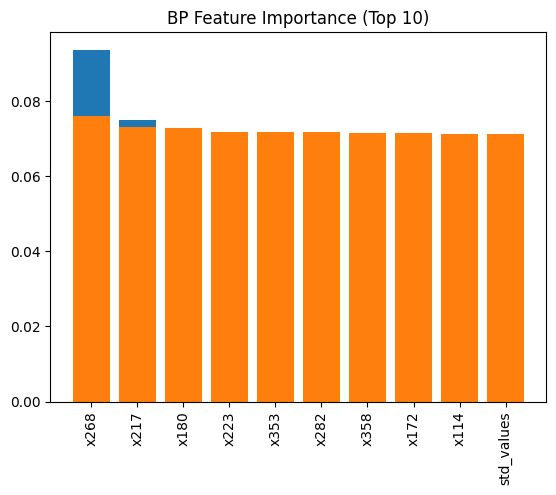

In [761]:
import numpy as np
importance_sj = SjModel.feature_importances_
indices_sj = importance_sj.argsort()[::-1][:10]  # 获取最重要的10个特征的索引
plt.bar(range(len(indices_sj)), importance_sj[indices_sj])
plt.xticks(range(len(indices_sj)), X_train.columns[indices_sj], rotation=90)
importance_bp = np.mean(np.abs(BpModel.coefs_[0]),axis=1)
indices_bp = importance_bp.argsort()[::-1][:10]  # 获取最重要的10个特征的索引
plt.bar(range(len(indices_bp)), importance_bp[indices_bp])
plt.xticks(range(len(indices_bp)), X_train.columns[indices_bp], rotation=90)
plt.title('BP Feature Importance (Top 10)')
plt.show()


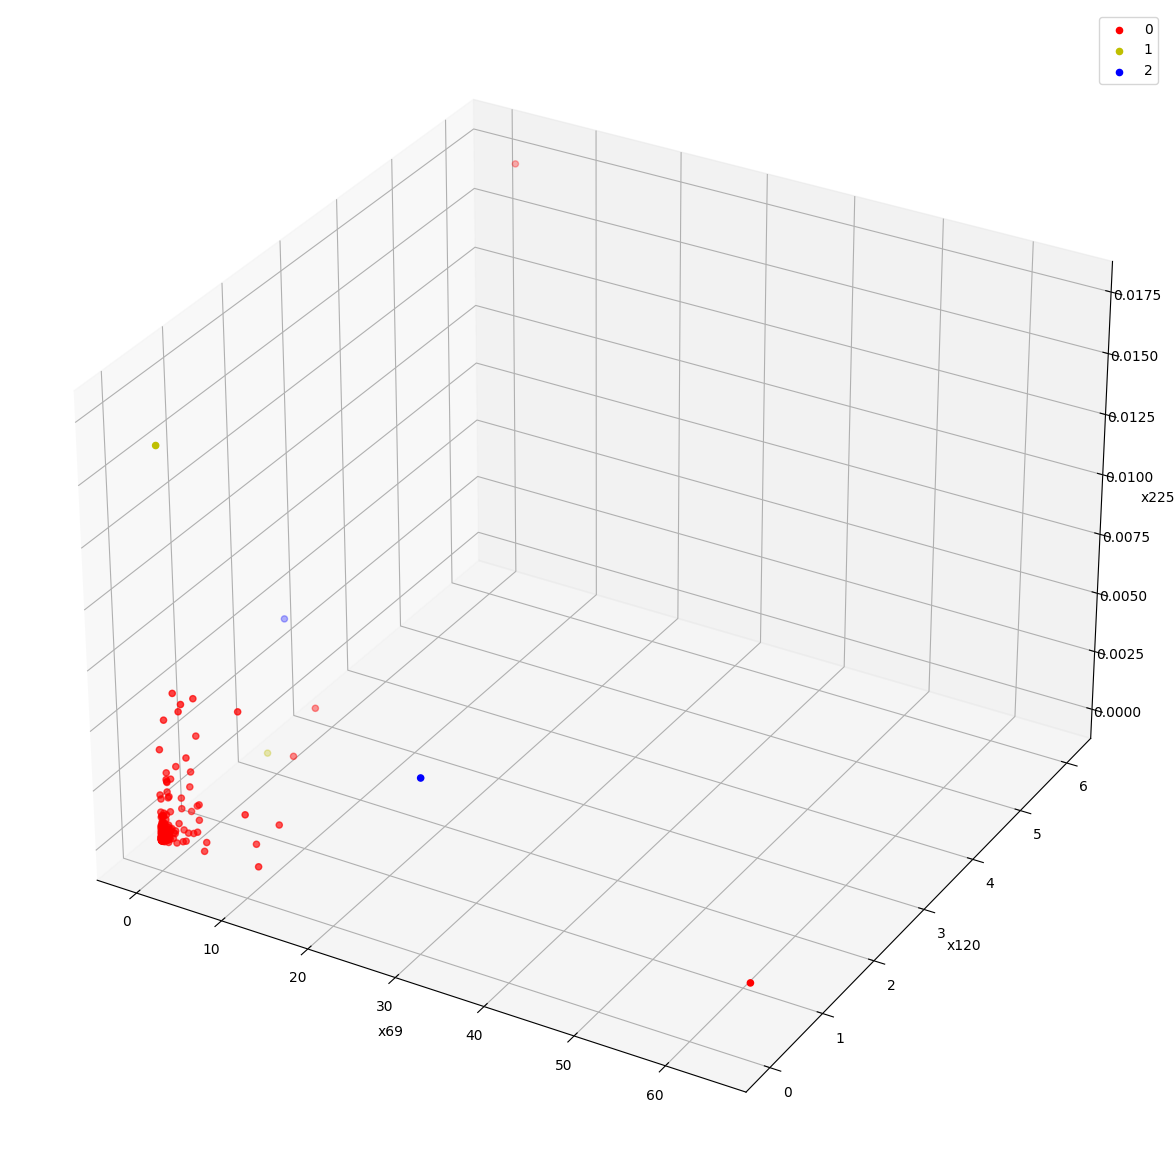

In [762]:
# 获取BP模型中最重要的三个特征的索引
# 将 coefs_ 数组扁平化，然后进行排序
coefs_flat = np.concatenate([a.flatten() for a in BpModel.coefs_])
indices_bp_flat = np.argsort(coefs_flat)[-3:]

# 将扁平化后的索引转换成二维数组的索引
indices_bp = []
num_features = BpModel.coefs_[0].shape[0]
for i in indices_bp_flat:
    layer_idx = i // num_features
    feature_idx = i % num_features
    indices_bp.append((layer_idx, feature_idx))
indices_bp = np.array(indices_bp)

# 将最重要的三个特征作为xyz轴
x = X_test.iloc[:, indices_bp[0, 1]]
y = X_test.iloc[:, indices_bp[1, 1]]
z = X_test.iloc[:, indices_bp[2, 1]]

# 根据label_q2的值绘制三维散点图
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_test == 0], y[y_test == 0], z[y_test == 0], c='r', label='0')
ax.scatter(x[y_test == 1], y[y_test == 1], z[y_test == 1], c='y', label='1')
ax.scatter(x[y_test == 2], y[y_test == 2], z[y_test == 2], c='b', label='2')
ax.set_xlabel(X_test.columns[indices_bp[0, 1]])
ax.set_ylabel(X_test.columns[indices_bp[1, 1]])
ax.set_zlabel(X_test.columns[indices_bp[2, 1]])
ax.legend()
plt.show()


In [763]:
# 将新列“label_q2”添加到df
features_df['label_q2'] = 0
# 将“label_q2”的前869行分配给df1中的相应值
features_df.loc[:868, 'label_q2'] = df1['label_q2'] + 1
features_df['label_q2'].value_counts()


label_q2
1    831
0    147
2     26
3     12
Name: count, dtype: int64

### 问题三

In [764]:

X_train, X_test, y_train, y_test = train_test_split(features_df.drop('label_q2', axis=1),
                                                    features_df['label_q2'], test_size=0.2, random_state=124)
X_train



,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,median_values,skewness_values,kurtosis_values,std_values,variance_values,diff_mean_values,diff_median_values,diff_abs_values,std_wavelet_values,var_wavelet_values
400,5007.2,5.971500,50.057,12.9690,6.8598,7.54580,22.8600,10.60000,38.478,118.680,...,0.000319,10.930508,132.149466,104.134777,1.084405e+04,-0.013810,-0.000004,13.464531,175.605523,3.083730e+04
45,6828.6,0.018545,188.950,1192.7000,410.0100,1350.60000,505.2900,332.61000,167.200,195.750,...,0.001259,9.136722,96.739129,109.991709,1.209818e+04,0.002726,0.000005,18.496504,46.139566,2.128860e+03
809,9564.2,18.200000,121.830,8.5160,3.6875,0.37572,11.6630,5.66520,64.794,939.390,...,0.001064,8.454369,77.194907,177.621999,3.154957e+04,-0.047778,-0.000028,21.958412,199.272147,3.970939e+04
364,146410.0,24.808000,425.270,32.5420,2.9635,19.56100,148.8800,303.03000,466.840,12.598,...,0.010897,15.352723,254.789285,4722.701021,2.230390e+07,-0.066133,0.000145,482.305069,6299.431609,3.968284e+07
23,2941.2,0.002602,26.289,44.9670,411.7100,585.09000,483.3600,474.60000,266.950,94.684,...,0.000562,8.508782,75.389527,54.168653,2.934243e+03,0.002771,-0.000032,4.260291,73.537999,5.407837e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,9238.7,11.234000,122.170,25.4870,4.4044,7.26890,95.7220,81.32400,43.389,213.540,...,0.002397,16.408364,283.589960,324.027258,1.049937e+05,-0.028428,-0.000022,34.038449,219.134513,4.801993e+04
215,27571.0,0.024587,21.783,5.8884,12.6450,13.03700,8.6969,197.84000,127.410,721.820,...,0.001134,11.004113,125.797475,677.302523,4.587387e+05,0.002709,-0.000008,53.751073,521.571137,2.720365e+05
622,36522.0,146.100000,561.280,3486.7000,2013.5000,4746.00000,4374.7000,1512.40000,1628.800,398.990,...,0.004896,7.426043,64.698409,446.848916,1.996740e+05,-0.403056,0.000017,49.527292,240.569920,5.787389e+04
339,5191.5,31.263000,166.790,22.4130,2.3772,32.82800,1984.0000,2167.10000,31.651,16.901,...,0.000783,13.096541,173.238425,155.332926,2.412832e+04,-0.084064,-0.000038,15.352039,200.986831,4.039571e+04


In [771]:
X_test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,median_values,skewness_values,kurtosis_values,std_values,variance_values,diff_mean_values,diff_median_values,diff_abs_values,std_wavelet_values,var_wavelet_values
400,5007.2,5.971500,50.057,12.9690,6.8598,7.54580,22.8600,10.60000,38.478,118.680,...,0.000319,10.930508,132.149466,104.134777,1.084405e+04,-0.013810,-0.000004,13.464531,175.605523,3.083730e+04
45,6828.6,0.018545,188.950,1192.7000,410.0100,1350.60000,505.2900,332.61000,167.200,195.750,...,0.001259,9.136722,96.739129,109.991709,1.209818e+04,0.002726,0.000005,18.496504,46.139566,2.128860e+03
809,9564.2,18.200000,121.830,8.5160,3.6875,0.37572,11.6630,5.66520,64.794,939.390,...,0.001064,8.454369,77.194907,177.621999,3.154957e+04,-0.047778,-0.000028,21.958412,199.272147,3.970939e+04
364,146410.0,24.808000,425.270,32.5420,2.9635,19.56100,148.8800,303.03000,466.840,12.598,...,0.010897,15.352723,254.789285,4722.701021,2.230390e+07,-0.066133,0.000145,482.305069,6299.431609,3.968284e+07
23,2941.2,0.002602,26.289,44.9670,411.7100,585.09000,483.3600,474.60000,266.950,94.684,...,0.000562,8.508782,75.389527,54.168653,2.934243e+03,0.002771,-0.000032,4.260291,73.537999,5.407837e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,9238.7,11.234000,122.170,25.4870,4.4044,7.26890,95.7220,81.32400,43.389,213.540,...,0.002397,16.408364,283.589960,324.027258,1.049937e+05,-0.028428,-0.000022,34.038449,219.134513,4.801993e+04
215,27571.0,0.024587,21.783,5.8884,12.6450,13.03700,8.6969,197.84000,127.410,721.820,...,0.001134,11.004113,125.797475,677.302523,4.587387e+05,0.002709,-0.000008,53.751073,521.571137,2.720365e+05
622,36522.0,146.100000,561.280,3486.7000,2013.5000,4746.00000,4374.7000,1512.40000,1628.800,398.990,...,0.004896,7.426043,64.698409,446.848916,1.996740e+05,-0.403056,0.000017,49.527292,240.569920,5.787389e+04
339,5191.5,31.263000,166.790,22.4130,2.3772,32.82800,1984.0000,2167.10000,31.651,16.901,...,0.000783,13.096541,173.238425,155.332926,2.412832e+04,-0.084064,-0.000038,15.352039,200.986831,4.039571e+04


In [765]:


# 建立决策树模型
jc = DecisionTreeClassifier()
jc.fit(X_train, y_train)
jcProbs = jc.predict_proba(X_test)
# 建立随机森林模型
sj = RandomForestClassifier()
sj.fit(X_train, y_train)
sjProbs = sj.predict_proba(X_test)
# 建立BP神经网络模型
bp = MLPClassifier()
bp.fit(X_train, y_train)
bpProbs = bp.predict_proba(X_test)

# 计算三种性能度量指标


jcAcc = accuracy_score(y_test, jc.predict(X_test))
jcPrec = precision_score(y_test, jc.predict(X_test), average='macro')
jcRec = recall_score(y_test, jc.predict(X_test), average='macro')
jcF = f1_score(y_test, jc.predict(X_test), average='macro')

bpAcc = accuracy_score(y_test, bp.predict(X_test))
bpPrec = precision_score(y_test, bp.predict(X_test), average='macro')
bpRec = recall_score(y_test, bp.predict(X_test), average='macro')
bpF = f1_score(y_test, bp.predict(X_test), average='macro')

sjAcc = accuracy_score(y_test, sj.predict(X_test))
sjPrec = precision_score(y_test, sj.predict(X_test), average='macro')
sjRec = recall_score(y_test, sj.predict(X_test), average='macro')
sjF = f1_score(y_test, sj.predict(X_test), average='macro')

# 输出三种模型的性能度量指标

print("决策树模型的性能度量指标：")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
    jcAcc, jcPrec, jcRec, jcF))
print("\nBP神经网络模型的性能度量指标:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
    bpAcc, bpPrec, bpRec, bpF))
print("\n随机森林模型的性能度量指标:")
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
    sjAcc, sjPrec, sjRec, sjF))


决策树模型的性能度量指标：
Accuracy: 0.9951, Precision: 0.8750, Recall: 0.9167, F1-score: 0.8667

BP神经网络模型的性能度量指标:
Accuracy: 0.8627, Precision: 0.4772, Recall: 0.6245, F1-score: 0.4880

随机森林模型的性能度量指标:
Accuracy: 0.9804, Precision: 0.8110, Recall: 0.8238, F1-score: 0.7194


In [766]:
# 计算y_test=1的总和
total1 = jcProbs[y_test == 1, 0].sum()
# 计算y_test=2的总和
total2 = jcProbs[y_test == 2, 0].sum()
# 计算y_test=3的总和
total3 = jcProbs[y_test == 3, 0].sum()
# 计算Y_test=1、2、3的样本总数
s1 = (y_test == 1).sum()
s2 = (y_test == 2).sum()
s3 = (y_test == 3).sum()
# 计算y_test=1的p
p1 = total1 / s1
# 计算y_test=2的p
p2 = total2 / s2
# 计算y_test=3的p
p3 = total3 / s3
print("决策树模型的认为近似0的概率:")
print("1: {: .4f}, : {:.4f}, 3: {:.4f}".format(p1, p2, p3))

# 计算y_test=1的总和
total1 = bpProbs[y_test == 1, 0].sum()
# 计算y_test=2的总和
total2 = bpProbs[y_test == 2, 0].sum()
# 计算y_test=3的总和
total3 = bpProbs[y_test == 3, 0].sum()
# 计算Y_test=1、2、3的样本总数
s1 = (y_test == 1).sum()
s2 = (y_test == 2).sum()
s3 = (y_test == 3).sum()
# 计算y_test=1的p
p1 = total1 / s1
# 计算y_test=2的p
p2 = total2 / s2
# 计算y_test=3的p
p3 = total3 / s3
print("BP神经网络模型的认为近似0的概率:")
print("1: {:.4f}, 2: {:.4f}, 3: {:.4f}".format(p1, p2, p3))

# 计算y_test=1的总和
total1 = sjProbs[y_test == 1, 0].sum()
# 计算y_test=2的总和
total2 = sjProbs[y_test == 2, 0].sum()
# 计算y_test=3的总和
total3 = sjProbs[y_test == 3, 0].sum()
# 计算Y_test=1、2、3的样本总数
s1 = (y_test == 1).sum()
s2 = (y_test == 2).sum()
s3 = (y_test == 3).sum()
# 计算y_test=1的p
p1 = total1 / s1
# 计算y_test=2的p
p2 = total2 / s2
# 计算y_test=3的p
p3 = total3 / s3
print("随机森林回归模型的认为近似0的概率:")
print("1: {:.4f}, 2: {:.4f}, 3: {:.4f}".format(p1, p2, p3))

df.to_csv("df_C.csv")

决策树模型的认为近似0的概率:
1:  0.0000, : 0.0000, 3: 0.0000
BP神经网络模型的认为近似0的概率:
1: 0.0356, 2: 0.0000, 3: 0.0000
随机森林回归模型的认为近似0的概率:
1: 0.0549, 2: 0.0200, 3: 0.0067
